In [1]:
import tensorboard as tb
import tensorflow as tf
import keras_preprocessing as kt
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.preprocessing import OneHotEncoder as hot
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.utils import gen_batches
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay

import keras_tuner as kt
from tensorflow import keras
from keras import layers

from keras.models import Sequential 
from keras.utils import to_categorical
from keras.layers import Activation, Dense, Input, Conv2D
from keras.layers import MaxPooling2D, Flatten, Dropout

import os

#https://keras.io/guides/functional_api/

In [3]:
from tensorflow.python.client import device_lib

print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

gpu_available = tf.test.is_gpu_available()

is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)

is_cuda_gpu_min_3 = tf.test.is_gpu_available(True, (3,0))

device_lib.list_local_devices()
print(tf. __version__) 

print("if true, GPU lives: ",tf.test.is_built_with_cuda())


Num CPUs Available:  1
Num GPUs Available:  1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
2.9.1
if true, GPU lives:  True


In [4]:
# load data and check dimensions
# Use the `load_breast_cancer` function to construct your dataset
(x, y), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode= 'fine')
assert x.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y.shape == (50000, 1)
assert y_test.shape == (10000, 1)

x_train      = x[:-10000]
x_validation = x[-10000]
y_train      = y[:-10000]
y_validation = y[-10000:]


print('------------init---------------------')
print('x: ', x.shape)
print('x validation: ', x_validation.shape)
print('x test: ', x_test.shape)
print('y: ', y.shape)
print('y validation: ', y_validation.shape)
print('y test: ', y_test.shape)
print('-------------------------------------')


print('------------prepared data------------')
x_train = np.expand_dims(x_train, -1).astype('float32')/255.0
print('x train: ', x_train.shape)

x_validation = np.expand_dims(x_validation, -1).astype('float')/255.0
print('x validation: ', x_validation.shape)

x_test = np.expand_dims(x_test, -1).astype('float')/255.0
print('x test: ', x_test.shape)

print('--------------------------------------')

number_of_classes = 100
y_train = keras.utils.to_categorical(y_train, number_of_classes)
print('y train: ', y_train.shape)

y_validation = keras.utils.to_categorical(y_validation, number_of_classes)
print('y validation: ', y_validation.shape)

y_test = keras.utils.to_categorical(y_test, number_of_classes)
print('y test: ', y_test.shape)
print('--------------------------------------')


------------init---------------------
x:  (50000, 32, 32, 3)
x validation:  (32, 32, 3)
x test:  (10000, 32, 32, 3)
y:  (50000, 1)
y validation:  (10000, 1)
y test:  (10000, 1)
-------------------------------------
------------prepared data------------
x train:  (40000, 32, 32, 3, 1)
x validation:  (32, 32, 3, 1)
x test:  (10000, 32, 32, 3, 1)
--------------------------------------
y train:  (40000, 100)
y validation:  (10000, 100)
y test:  (10000, 100)
--------------------------------------


In [5]:
class ClassificationHyperModel(kt.HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def add_dense_layer(d,d,d,d,d,d,d,d,d):

In [6]:
# Instantiate model
input_shape = x_validation[1]

cifar100_model = ClassificationHyperModel(input_shape)

classification_objective_settings = kt.Objective("val_loss", direction ='max')

early_stop = [tf.keras.callbacks.EarlyStopping(monitor = 'acc', patience = 5)] # change this for monitoring val_loss

In [8]:
# Create hyper-parameter search
## Random search tuner
random_search_tuner = kt.RandomSearch(
    hypermodel              = cifar100_model,       # Neural network model, classification/regression
    objective               = classification_objective_settings,
    max_trials              = 3,                    # change this for further tuning   |tried: 10, 
    seed                    = 42,
    executions_per_trial    = 2,                    # change this for further tuning   |tried: 2,  
    overwrite               = True,
    directory               = os.path.normpath('C:\\Users\\manga\\Desktop\\test_nn'), # Change path
    project_name            = 'RandomSearch',                                      # Change name
)

random_search_tuner.search(# https://keras.io/api/keras_tuner/tuners/random/#randomsearch-class
    x                       = x_validation,
    y                       = y_validation,
    epochs                  = 10,
    validation_data         = (x_validation, y_validation),
    callbacks               = early_stop,
    verbose                 = 1,
)
# # Bayesian Optimization
# bayesian_tuner = kt.BayesianOptimization(
#     hyoer_model             = cifar100_model,     # Neural network model, classification/regression
#     objective               = objective_settings,
#     max_trials              = 3,                  # change this for further tuning
#     seed                    = 42,                           
#     executions_per_trial    = 2,                  # change this for further tuning
#     overwrite               = True,
#     directory               = os.path.normpath('C:\\Users\\manga\\Desktop\\test_nn'), # Change path     
#     project_name            = 'BayesianOptimization',# Change name
# )

# bayesian_tuner.search(# https://keras.io/api/keras_tuner/tuners/bayesian/#bayesianoptimization-class
#     x                       = Z_train,
#     y                       = y_train_target,
#     epochs                  = 10,
#     validation_data         = (Z_val, y_validation_target),
#     callbacks               = early_stop,
#     verbose                 = 1,
# )



# Hyperband
# hyper_band_tuner = kt.Hyperband(
#     hyper_model           = regression_model,     # Neural network model, classification/regression
#     objective             = objective_settings,      
#     max_epochs            = 100,                  # change this for further tuning    |tried: 10,           
#     factor                = 10,                   # change this for further tuning   |tried: 3,
#     overwrite             = True,
#     directory             = os.path.normpath('C:\\Users\\manga\\Desktop\\test_nn'), # Change path
#     project_name          = 'Hyperband',          # Change name
#     seed = 42,                           
# )

# hyper_band_tuner.search(# https://keras.io/api/keras_tuner/tuners/hyperband/ | Den er rocker langsom !!
#     Z_train,                                      # article and explanation of hyper band search
#     y_train_target,
#     epochs = 10,
#     validation_data = (Z_val, y_validation_target),
#     callbacks = early_stop,
#     verbose = 1,
#     )


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
2                 |?                 |num_layers
64                |?                 |hp_units0
relu              |?                 |activation
0.03              |?                 |dropout
RMSprop           |?                 |optimizer
mae               |?                 |metrics
mae               |?                 |loss



ValueError: Data cardinality is ambiguous:
  x sizes: 32
  y sizes: 10000
Make sure all arrays contain the same number of samples.

shape:  (None, 784)
data type:  <dtype: 'float32'>
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_60 (Dense)            (None, 64)                50240     
                                                                 
 dense_61 (Dense)            (None, 64)                4160      
                                                                 
 dense_62 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


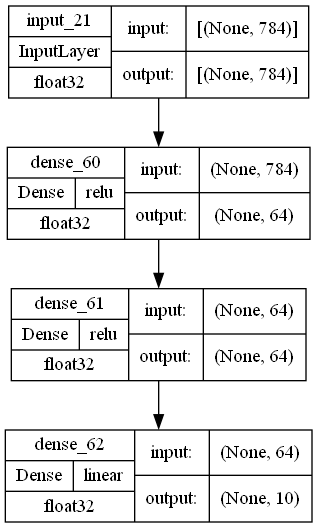

In [36]:
inputs = keras.Input(shape=(784,)) # image size and the input node
print('shape: ', inputs.shape)
print('data type: ', inputs.dtype)

dense = layers.Dense(64, activation="relu",)
x = dense(inputs)

x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10)(x)

mnist_model = keras.Model(inputs = inputs, outputs = outputs, name = 'mnist_model')

mnist_model.summary()

keras.utils.plot_model(
    mnist_model,
    'my_first_model.png',
    show_dtype = True,
    show_layer_activations = True,
    show_layer_names =True,
    show_shapes = True)

In [52]:
mnist_model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.RMSprop(),
    metrics = ['accuracy']
)

history = mnist_model.fit(
    vectorized_x_train,
    y,
    epochs = 2,
    batch_size = 64,
    validation_split = 0.2,
)

test_scores = mnist_model.evaluate(
    vectorized_x_test,
    y_test,
    verbose = 2)

print('Test loss: ', test_scores[0])
print('Test accuracy: ', test_scores[1])

mnist_model.save(filepath= 'C:\\Users\\manga\\Desktop\\test_nn')




Epoch 1/2
750/750 [==============================] - 3s 3ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.1136 - val_accuracy: 0.9741
Epoch 2/2
750/750 [==============================] - 2s 3ms/step - loss: 0.0297 - accuracy: 0.9910 - val_loss: 0.1289 - val_accuracy: 0.9710
313/313 - 0s - loss: 0.1242 - accuracy: 0.9697 - 487ms/epoch - 2ms/step
Test loss:  0.12418029457330704
Test accuracy:  0.9696999788284302
INFO:tensorflow:Assets written to: C:\Users\manga\Desktop\test_nn\assets


In [51]:
load_name_model = keras.models.load_model('C:\Users\manga\Desktop\test_nn\assets')
load_name_model = keras.models.load_model('C:\\Users\\manga\\Desktop\\test_nn')

Epoch 1/2
750/750 [==============================] - 3s 3ms/step - loss: 0.0317 - accuracy: 0.9905 - val_loss: 0.1147 - val_accuracy: 0.9750
Epoch 2/2
750/750 [==============================] - 2s 3ms/step - loss: 0.0274 - accuracy: 0.9920 - val_loss: 0.1271 - val_accuracy: 0.9738
313/313 - 0s - loss: 0.1202 - accuracy: 0.9709 - 479ms/epoch - 2ms/step
Test loss:  0.12021493166685104
Test accuracy:  0.9708999991416931


In [5]:
# transform data
# Scale the data

x_data_transformed = scaler.fit_transform(x)
#y_data_transformed = scaler.fit_transform(y_train)
x_test_transformed = scaler.transform(x_test)
#y_test_transformed = scaler.transform(y_train)

print('x data transformed: ', x_data_transformed.shape,)
#print('y data transformed: ', y_data_transformed.shape,)
print('x test transformed: ', x_test_transformed.shape,)
#print('y data transformed: ', y_test_transformed.shape,)

x data transformed:  (364, 30)
x test transformed:  (114, 30)


In [6]:
# create baseline model
# Build your own, new neural network here
def build_tuner_classification(model, hyper_parameter_method, number_of_trials, random_seed = None, **kwargs):
    if hyper_parameter_method == 'Bayesian':
        tuner = kt.BayesianOptimization(
            hyper_model             = model,
            objective               = 'val_accuracy',
            max_trials              = number_of_trials,
            seed                    = random_seed,                           
            executions_per_trial    = 2,                  # change this for further tuning
            overwrite               = True,
            directory               = os.path.normpath('C:\\Users\\manga\\Desktop\\test_nn'), # Change path     
            project_name            = 'BayesianOptimization',# Change name
        )
    elif hyper_parameter_method == 'Hyperband':
        tuner = kt.Hyperband(
            hyper_model           = model,     # Neural network model, classification/regression
            objective             = 'val_accuracy',      
            max_epochs            = 100,                  # change this for further tuning    |tried: 10,           
            factor                = 10,                   # change this for further tuning   |tried: 3,
            overwrite             = True,
            directory             = os.path.normpath('C:\\Users\\manga\\Desktop\\test_nn'), # Change path
            project_name          = 'Hyperband',          # Change name
            seed = random_seed,                           
        )
    elif hyper_parameter_method == 'Random':
        tuner = kt.RandomSearch(
            hyper_model           = model,     # Neural network model, classification/regression
            objective             = 'val_accuracy',      
            max_trials            = 100,                  # change this for further tuning    |tried: 10,           
            seed                  = random_seed,                   # change this for further tuning   |tried: 3,
            overwrite             = True,
            directory             = os.path.normpath('C:\\Users\\manga\\Desktop\\test_nn'), # Change path
            project_name          = 'RandomSearch',          # Change name
        )
    else:
        print('No hyper parameter method was selected')
        return None
    return tuner

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(      #https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
            units                = 64,
            activation           = 'relu',
            input_shape          = (30,),
            use_bias             = False,       # implements a boolean, if the layer should use a bias vector
            kernel_initializer   = 'glorot_uniform',
            bias_initializer     = 'zeros',
            kernel_regularizer   = None,
            bias_regularizer     = None,
            activity_regularizer = None,
            kernel_constraint    = None,
            bias_constraint      = None,
        ),

        tf.keras.layers.Dense( 
            units                = 128,
            activation           = 'relu',
            input_shape          =(30,),
            use_bias             = False,       # implements a boolean, if the layer should use a bias vector
            kernel_initializer   = 'glorot_uniform',
            bias_initializer     = 'zeros',
            kernel_regularizer   = None,
            bias_regularizer     = None,
            activity_regularizer = None,
            kernel_constraint    = None,
            bias_constraint      = None,
        ),
          
        tf.keras.layers.Dense( 
            units                = 2,
            activation           = 'softmax', # used for classification problems
            input_shape          = (30,),
            use_bias             = False,       # implements a boolean, if the layer should use a bias vector
            kernel_initializer   = 'glorot_uniform',
            bias_initializer     = 'zeros',
            kernel_regularizer   = None,
            bias_regularizer     = None,
            activity_regularizer = None,
            kernel_constraint    = None,
            bias_constraint      = None,
        ),
        # add new layers here
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1920      
                                                                 
 dense_1 (Dense)             (None, 128)               8192      
                                                                 
 dense_2 (Dense)             (None, 2)                 256       
                                                                 
Total params: 10,368
Trainable params: 10,368
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile it, train it, and evaluate it
#https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile
model.compile(
    optimizer           ='sgd',                                 #
    loss                = "sparse_categorical_crossentropy",    #
    metrics             = 'accuracy',                           #
    loss_weights        = None,                                 #
    weighted_metrics    = None,                                 #
    run_eagerly         = None,                                 #
    steps_per_execution = None,                                 #
    jit_compile         = None,                                 #
    )
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
model.fit(
    x = x_data_transformed,             # input data
    y = y,                        # target data
    batch_size            = None,       #
    epochs                = 20,         #
    verbose               = 'auto',     #
    callbacks             = None,       #
    validation_split      = 0.0,        #
    validation_data       = None,       #
    shuffle               = True,       #
    class_weight          = None,       #
    sample_weight         = None,       #
    initial_epoch         = 0,          #
    steps_per_epoch       = None,       #
    validation_steps      = None,       #
    validation_batch_size = None,       #
    validation_freq       = 1,          #
    max_queue_size        = 10,         #
    workers               = 1,          #
    use_multiprocessing   = False       #
)
#https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
loss, accuracy = model.evaluate(
    x = x_test_transformed,         # input data
    y = y_test,                     # target data
    batch_size          = None,     # number of samples per batch
    verbose             = 'auto',   # 
    sample_weight       = None,     #
    steps               = None,     #
    callbacks           = None,     #
    max_queue_size      = 10,       #
    workers             = 1,        #
    use_multiprocessing = False,    #
    return_dict         = False,    #
)

print(
    f'\nOut first neural network managed {round(accuracy * 100, 2)}% accuracy.'
)


Epoch 1/20
12/12 [==============================] - 2s 2ms/step - loss: 0.6959 - accuracy: 0.5522
Epoch 2/20
12/12 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.8764
Epoch 3/20
12/12 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.9176
Epoch 4/20
12/12 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.9396
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.3278 - accuracy: 0.9368
Epoch 6/20
12/12 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.9423
Epoch 7/20
12/12 [==============================] - 0s 2ms/step - loss: 0.2659 - accuracy: 0.9451
Epoch 8/20
12/12 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.9478
Epoch 9/20
12/12 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9478
Epoch 10/20
12/12 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9505
Epoch 11/20
12/12 [

In [ ]:
# evaluate bayesian
evaluation_bayesian = pd.DataFrame('Accuracy')

In [ ]:
# evaluate random search
evaluation_random_search = pd.DataFrame()

In [ ]:
# evaluate hyper band
evaluation_hyper_band = pd.DataFrame()

In [ ]:
class ClassificationHyperModel(kt.HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = tf.keras.Sequential()
        for i in range(hp.Int("num_layers", 1, 3)): # change this for further tuning | Changes the amount of hidden layers used for the model
            model.add(                              
                tf.keras.layers.Dense(
                    # Tune number of units separately.
                    units = hp.Int(
                        f"hp_units{i}",
                        min_value = 32,             # change this for further tuning
                        max_value = 512,            # change this for further tuning
                        step = 32),                 # change this for further tuning
                        activation = hp.Choice(
                        "activation",
                        values = ["relu"]),         # change this for further tuning - 'tahn', 'sigmoid'
                    )
                )
        
        model.add(
            tf.keras.layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value = 0.0,                  # change this for further tuning
                    max_value = 0.1,                  # change this for further tuning
                    default = 0.005,                  # change this for further tuning
                    step = 0.01)                      # change this for further tuning
            )
        )
        
        model.add(tf.keras.layers.Dense(1))
        
        optimizer_choices = hp.Choice(
            name = "optimizer",
            values = ['RMSprop', 'adam', 'SGD'])      # change this for further tuning 
        if optimizer_choices =='adam':
            hp.Float(
                name = "learning_rate",               
                min_value = 0.0001,                   # change this for further tuning
                max_value = 0.05,                     # change this for further tuning
                sampling = "log")                     # change this for further tuning
        
        elif optimizer_choices =='RMSdrop':
            hp.Float(
                name = "learning_rate",
                min_value = 0.0001,                   # change this for further tuning
                max_value = 0.01,                     # change this for further tuning
                sampling = "log")                     # change this for further tuning

        elif optimizer_choices == 'SGD':
            hp.Float(
                name = "learning_rate",               # change this for further tuning
                min_value = 0.0001,                   # change this for further tuning
                max_value = 0.01,                     # change this for further tuning
                sampling = "log")                     # change this for further tuning
        
        metric_choices = hp.Choice(
            name = 'metrics',
            values = ['mae'])                         # change this for further tuning | mape = oppesite of accuracy, , 'mae', 'mse', 'mape'

        loss_choices = hp.Choice(
            name = 'loss',
            values = ['mae'])                         # change this for further tuning | , 'mae', 'mse', 'mape'

        model.compile(
            optimizer = optimizer_choices,
            loss = metric_choices,
            metrics = loss_choices
        )
        
        return model